# ML PROJECT

## College Placement Predictions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
new_df=df.drop('Unnamed: 0',axis=1)

In [9]:
new_df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
new_df.describe()

,cgpa,iq,placement
count,100.000000,100.000000,100.000000
mean,5.991000,123.580000,0.500000
std,1.143634,39.944198,0.502519
min,3.300000,37.000000,0.000000
25%,5.075000,101.500000,0.000000
50%,6.000000,127.500000,0.500000
75%,6.900000,149.000000,1.000000
max,8.500000,233.000000,1.000000


# Data Visualisation

Text(0.5, 1.0, 'Scatterplot of IQ and CGPA')

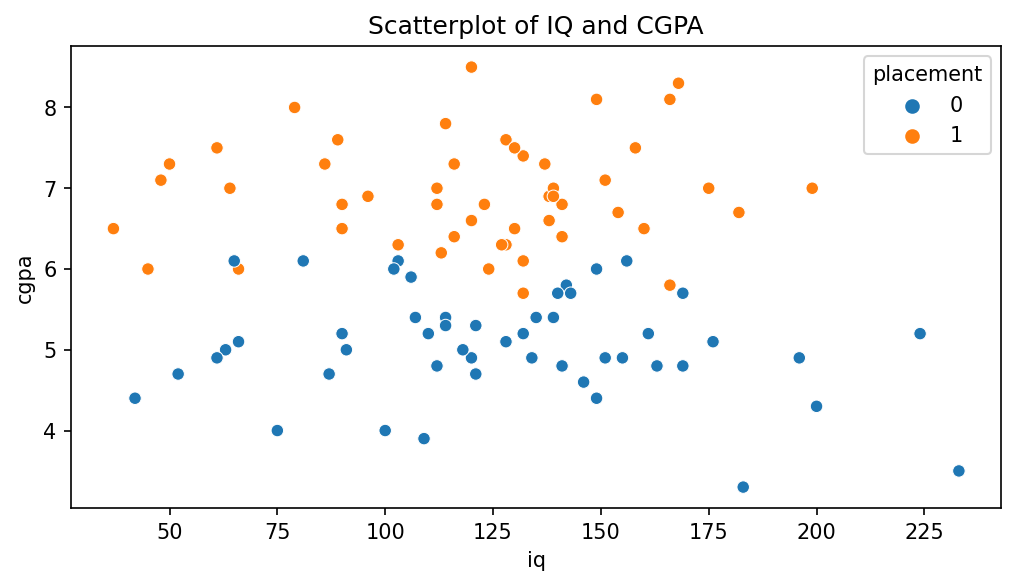

In [12]:
plt.figure(figsize=(8,4), dpi=150)
sns.scatterplot(data=new_df, y='cgpa', x='iq', hue='placement')
plt.title('Scatterplot of IQ and CGPA')

In [13]:
df['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

#### Lets explore the distribution of the student IQ and CGPA scores in the dataset.

Text(0.5, 1.0, 'Distribution of Student IQ')

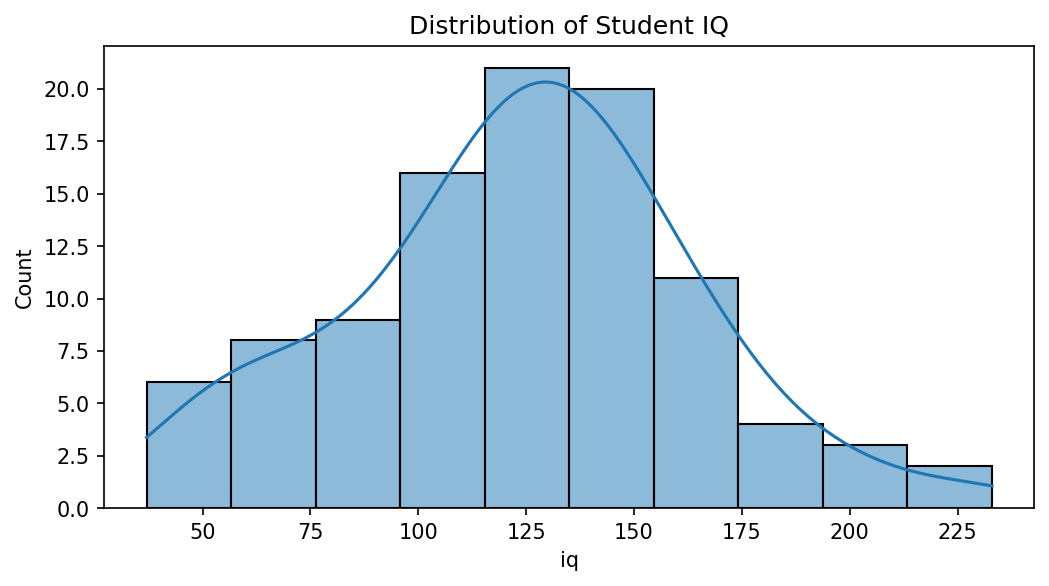

In [14]:
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data=new_df, x='iq', kde=True)
plt.title('Distribution of Student IQ')


Text(0.5, 1.0, 'Distribution of Student CGPA')

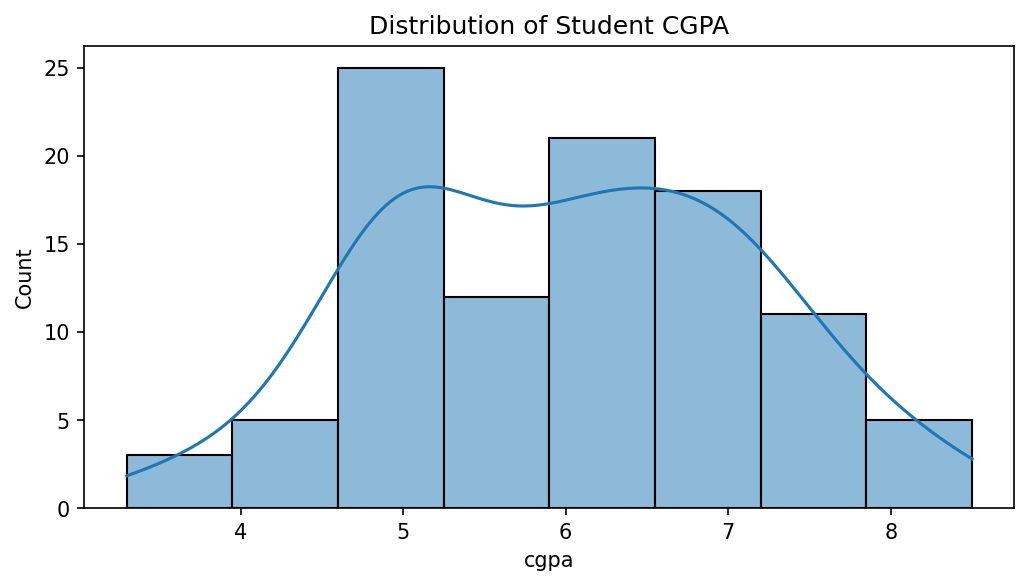

In [15]:
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data=new_df, x='cgpa', kde=True)
plt.title('Distribution of Student CGPA')

## Train Test Split

##### The dataset is prepared for a machine learning model to predict placement status based on student-related features. The features (X) are obtained by excluding the 'placement' column, which serves as the target variable (y). The data is then split into training and test sets using the train_test_split function from scikit-learn. To ensure consistency in the model, the features are standardized using the StandardScaler, with the scaler fitted and applied to both the training (scaled_X_train) and test sets (scaled_X_test)

### A.Linear Regression

In [16]:
# Prepare the features and target variable
X = df.drop('placement', axis=1) # features
y = df['placement'] #target variable

# Train test split and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Creating a StandardScaler object
scaler = StandardScaler()

# fit scaler object unto training data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

###### A linear regression model is created and trained using the scikit-learn library. The LinearRegression class is imported, and an instance of the model is created as 'linear_model.' This model will be trained on the prepared dataset to establish relationships between the input features and the target variable, contributing to the predictive capabilities of the model

In [17]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

##### The Linear Regression model is fitted to the standardized training data (scaled_X_train) and the corresponding target variable (y_train). This process involves training the model to learn the relationships between the standardized input features and the target variable, enabling it to make predictions on new, unseen data based on the learned patterns from the training set

In [18]:
linear_model.fit(scaled_X_train, y_train)


LinearRegression()

In [19]:
y_pred = linear_model.predict(scaled_X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

In [21]:
MAE,MSE

(0.2314549524787417, 0.06721532524709849)

###### The MAE value of approximately 0.23 suggests that, on average, the model's predictions deviate by 0.23 units from the actual values in the test set. Lower MAE values indicate better model performance, and 0.23 is a relatively small error, suggesting that the model is making accurate predictions on average.



###### The MSE value of approximately 0.067 indicates the average of the squared errors. Since MSE squares the errors, it tends to be more sensitive to large errors than MAE. Like MAE, lower MSE values are desirable. In this case, the relatively small MSE suggests that, on average, the model's predictions have small squared differences from the actual values.

In [22]:
linear_model.coef_

array([0.0388603 , 0.40526868, 0.00583616])

In [23]:
coeff_df = pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Unnamed: 0,0.038860
cgpa,0.405269
iq,0.005836


In [24]:
new_df.corr()

,cgpa,iq,placement
cgpa,1.000000,-0.098791,0.821688
iq,-0.098791,1.000000,-0.083031
placement,0.821688,-0.083031,1.000000


In [25]:
#strong correlation between good cgpa and placement

#### B.Logistic Regression

In [26]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

# log model is fitted unto the standardised X trained data and y_train
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [27]:
y_pred = log_model.predict(scaled_X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix


array([[11,  0],
       [ 1,  8]], dtype=int64)

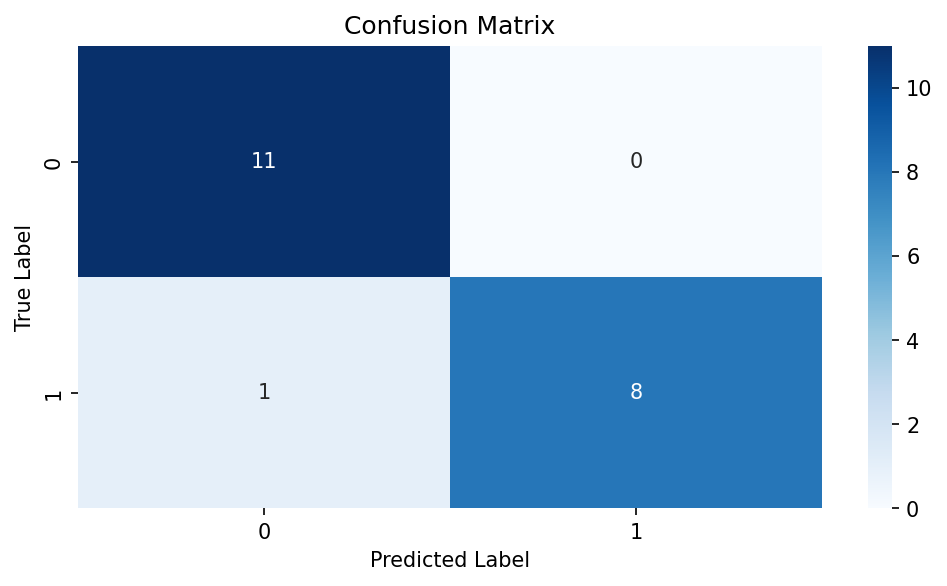

In [30]:
plt.figure(figsize=(8, 4), dpi=150)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



##### The Logistic Regression model was applied to predict student placement based on features such as CGPA and IQ. The evaluation metrics, including the confusion matrix and classification report, provide insights into the model's performance.

## Classification Report interpretion:

##### Precision: Precision for class 0 (non-placement) is 0.92, and for class 1 (placement) is 1.00.



##### Recall: Recall for class 0 is 1.00, and for class 1 is 0.89.

##### F1-Score: F1-score balances precision and recall, yielding high values for both classes.

##### Accuracy: Overall accuracy of the model is 95%.

# Testing The Prediction Of the Model

In [34]:
test_student = X_test.iloc[0]
test_student

Unnamed: 0     16.0
cgpa            5.2
iq            224.0
Name: 16, dtype: float64

In [35]:
log_model.predict(test_student.values.reshape(1, -1))

array([1], dtype=int64)

In [36]:
# checking placement 
y_test.iloc[0]


0